In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_new.csv")   # update filename if needed

df.head()



,id,MGW.MGW_1,MGW.MGW_2,MGW.MGW_3,MGW.MGW_4,MGW.MGW_5,MGW.MGW_6,MGW.MGW_7,MGW.MGW_8,MGW.MGW_9,...,EP.EP_7,EP.EP_8,EP.EP_9,EP.EP_10,EP.EP_11,EP.EP_12,EP.EP_13,EP.EP_14,EP.EP_15,label
0,neg_chr1_10003124-10003139_+_130871,NaN,NaN,4.95,5.42,5.56,4.93,4.77,4.96,5.39,...,-5.45,-5.57,-5.02,-6.68,-5.96,-7.86,-8.20,NaN,NaN,0
1,neg_chr1_10003350-10003365_+_96514,NaN,NaN,5.32,5.94,5.66,5.17,5.37,5.29,4.77,...,-5.10,-5.09,-5.21,-5.63,-6.99,-5.23,-7.65,NaN,NaN,0
2,neg_chr1_10003396-10003411_+_161663,NaN,NaN,4.94,5.30,5.29,4.77,4.97,5.76,5.55,...,-5.65,-6.82,-7.09,-5.71,-5.73,-6.99,-5.09,NaN,NaN,0
3,neg_chr1_10003430-10003445_+_150933,NaN,NaN,5.41,5.09,5.36,5.19,4.94,4.75,4.76,...,-5.31,-5.25,-5.29,-5.23,-7.34,-5.61,-5.27,NaN,NaN,0
4,neg_chr1_10003508-10003523_+_168825,NaN,NaN,5.46,5.19,5.13,5.53,5.43,5.06,5.08,...,-5.19,-5.16,-5.10,-5.25,-7.29,-5.36,-4.90,NaN,NaN,0


In [3]:

df.shape

(190270, 75)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190270 entries, 0 to 190269
Data columns (total 75 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            190270 non-null  object 
 1   MGW.MGW_1     0 non-null       float64
 2   MGW.MGW_2     0 non-null       float64
 3   MGW.MGW_3     190270 non-null  float64
 4   MGW.MGW_4     190270 non-null  float64
 5   MGW.MGW_5     190270 non-null  float64
 6   MGW.MGW_6     190270 non-null  float64
 7   MGW.MGW_7     190270 non-null  float64
 8   MGW.MGW_8     190270 non-null  float64
 9   MGW.MGW_9     190270 non-null  float64
 10  MGW.MGW_10    190270 non-null  float64
 11  MGW.MGW_11    190270 non-null  float64
 12  MGW.MGW_12    190270 non-null  float64
 13  MGW.MGW_13    190270 non-null  float64
 14  MGW.MGW_14    0 non-null       float64
 15  MGW.MGW_15    0 non-null       float64
 16  HelT.HelT_1   0 non-null       float64
 17  HelT.HelT_2   190270 non-null  float64
 18  HelT

In [5]:
df.isna().sum().sort_values(ascending=False).head(20)


MGW.MGW_1       190270
MGW.MGW_2       190270
EP.EP_1         190270
ProT.ProT_14    190270
ProT.ProT_15    190270
ProT.ProT_2     190270
HelT.HelT_14    190270
ProT.ProT_1     190270
HelT.HelT_1     190270
MGW.MGW_15      190270
MGW.MGW_14      190270
Roll.Roll_14    190270
EP.EP_2         190270
EP.EP_14        190270
EP.EP_15        190270
Roll.Roll_1     190270
MGW.MGW_10           0
MGW.MGW_4            0
MGW.MGW_3            0
id                   0
dtype: int64

In [6]:
df = df.dropna(axis=1, how="all")


In [7]:
df.dropna(axis=1, how="all").shape


(190270, 59)

In [8]:
df

,id,MGW.MGW_3,MGW.MGW_4,MGW.MGW_5,MGW.MGW_6,MGW.MGW_7,MGW.MGW_8,MGW.MGW_9,MGW.MGW_10,MGW.MGW_11,...,EP.EP_5,EP.EP_6,EP.EP_7,EP.EP_8,EP.EP_9,EP.EP_10,EP.EP_11,EP.EP_12,EP.EP_13,label
0,neg_chr1_10003124-10003139_+_130871,4.95,5.42,5.56,4.93,4.77,4.96,5.39,5.56,5.14,...,-5.24,-5.35,-5.45,-5.57,-5.02,-6.68,-5.96,-7.86,-8.20,0
1,neg_chr1_10003350-10003365_+_96514,5.32,5.94,5.66,5.17,5.37,5.29,4.77,4.94,5.47,...,-5.18,-5.05,-5.10,-5.09,-5.21,-5.63,-6.99,-5.23,-7.65,0
2,neg_chr1_10003396-10003411_+_161663,4.94,5.30,5.29,4.77,4.97,5.76,5.55,4.33,4.54,...,-5.09,-5.21,-5.65,-6.82,-7.09,-5.71,-5.73,-6.99,-5.09,0
3,neg_chr1_10003430-10003445_+_150933,5.41,5.09,5.36,5.19,4.94,4.75,4.76,4.85,5.05,...,-5.02,-5.12,-5.31,-5.25,-5.29,-5.23,-7.34,-5.61,-5.27,0
4,neg_chr1_10003508-10003523_+_168825,5.46,5.19,5.13,5.53,5.43,5.06,5.08,5.09,5.02,...,-5.29,-6.56,-5.19,-5.16,-5.10,-5.25,-7.29,-5.36,-4.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190265,pos_chrX_99891882-99891897_+_94045,5.41,4.96,4.82,4.75,4.62,4.85,5.52,5.41,5.17,...,-5.39,-5.25,-5.38,-5.52,-6.71,-5.08,-5.05,-5.23,-5.29,1
190266,pos_chrX_99909430-99909445_-_94046,5.41,5.24,5.23,5.53,4.66,4.98,5.56,5.31,5.02,...,-5.43,-6.99,-7.78,-5.82,-6.68,-5.28,-5.61,-7.26,-5.70,1
190267,pos_chrX_99926330-99926345_-_94047,5.41,5.02,4.73,4.78,4.97,5.14,5.75,5.16,5.27,...,-5.05,-5.55,-7.16,-5.67,-6.55,-5.70,-5.22,-6.99,-5.58,1
190268,pos_chrX_99940859-99940874_-_94048,5.66,5.02,4.82,4.75,4.62,4.85,5.52,5.16,5.27,...,-5.39,-5.25,-5.38,-5.52,-6.71,-5.70,-5.22,-6.56,-5.30,1


In [9]:
df.head()

,id,MGW.MGW_3,MGW.MGW_4,MGW.MGW_5,MGW.MGW_6,MGW.MGW_7,MGW.MGW_8,MGW.MGW_9,MGW.MGW_10,MGW.MGW_11,...,EP.EP_5,EP.EP_6,EP.EP_7,EP.EP_8,EP.EP_9,EP.EP_10,EP.EP_11,EP.EP_12,EP.EP_13,label
0,neg_chr1_10003124-10003139_+_130871,4.95,5.42,5.56,4.93,4.77,4.96,5.39,5.56,5.14,...,-5.24,-5.35,-5.45,-5.57,-5.02,-6.68,-5.96,-7.86,-8.20,0
1,neg_chr1_10003350-10003365_+_96514,5.32,5.94,5.66,5.17,5.37,5.29,4.77,4.94,5.47,...,-5.18,-5.05,-5.10,-5.09,-5.21,-5.63,-6.99,-5.23,-7.65,0
2,neg_chr1_10003396-10003411_+_161663,4.94,5.30,5.29,4.77,4.97,5.76,5.55,4.33,4.54,...,-5.09,-5.21,-5.65,-6.82,-7.09,-5.71,-5.73,-6.99,-5.09,0
3,neg_chr1_10003430-10003445_+_150933,5.41,5.09,5.36,5.19,4.94,4.75,4.76,4.85,5.05,...,-5.02,-5.12,-5.31,-5.25,-5.29,-5.23,-7.34,-5.61,-5.27,0
4,neg_chr1_10003508-10003523_+_168825,5.46,5.19,5.13,5.53,5.43,5.06,5.08,5.09,5.02,...,-5.29,-6.56,-5.19,-5.16,-5.10,-5.25,-7.29,-5.36,-4.90,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190270 entries, 0 to 190269
Data columns (total 59 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            190270 non-null  object 
 1   MGW.MGW_3     190270 non-null  float64
 2   MGW.MGW_4     190270 non-null  float64
 3   MGW.MGW_5     190270 non-null  float64
 4   MGW.MGW_6     190270 non-null  float64
 5   MGW.MGW_7     190270 non-null  float64
 6   MGW.MGW_8     190270 non-null  float64
 7   MGW.MGW_9     190270 non-null  float64
 8   MGW.MGW_10    190270 non-null  float64
 9   MGW.MGW_11    190270 non-null  float64
 10  MGW.MGW_12    190270 non-null  float64
 11  MGW.MGW_13    190270 non-null  float64
 12  HelT.HelT_2   190270 non-null  float64
 13  HelT.HelT_3   190270 non-null  float64
 14  HelT.HelT_4   190270 non-null  float64
 15  HelT.HelT_5   190270 non-null  float64
 16  HelT.HelT_6   190270 non-null  float64
 17  HelT.HelT_7   190270 non-null  float64
 18  HelT

In [11]:
df.isna().sum().sum()


np.int64(0)

In [12]:
df['label'].value_counts()
df['label'].value_counts(normalize=True)


label
0    0.5
1    0.5
Name: proportion, dtype: float64

In [13]:
df.describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
MGW.MGW_3,190270.0,5.130429,0.459550,2.85,4.84,5.27,5.41,6.20
MGW.MGW_4,190270.0,4.988539,0.409215,2.85,4.80,4.96,5.24,6.20
MGW.MGW_5,190270.0,4.988412,0.460577,2.85,4.73,4.90,5.37,6.20
MGW.MGW_6,190270.0,5.016186,0.456744,2.85,4.75,4.93,5.41,6.20
MGW.MGW_7,190270.0,4.877065,0.431066,2.85,4.62,4.84,5.08,6.20
MGW.MGW_8,190270.0,4.949221,0.453749,2.85,4.73,4.94,5.23,6.20
MGW.MGW_9,190270.0,5.194085,0.489057,2.85,4.92,5.31,5.53,6.20
MGW.MGW_10,190270.0,5.098930,0.455963,2.85,4.85,5.16,5.40,6.20
MGW.MGW_11,190270.0,5.056587,0.440863,2.85,4.84,5.10,5.30,6.20
MGW.MGW_12,190270.0,5.171736,0.461527,2.85,4.93,5.30,5.52,6.20


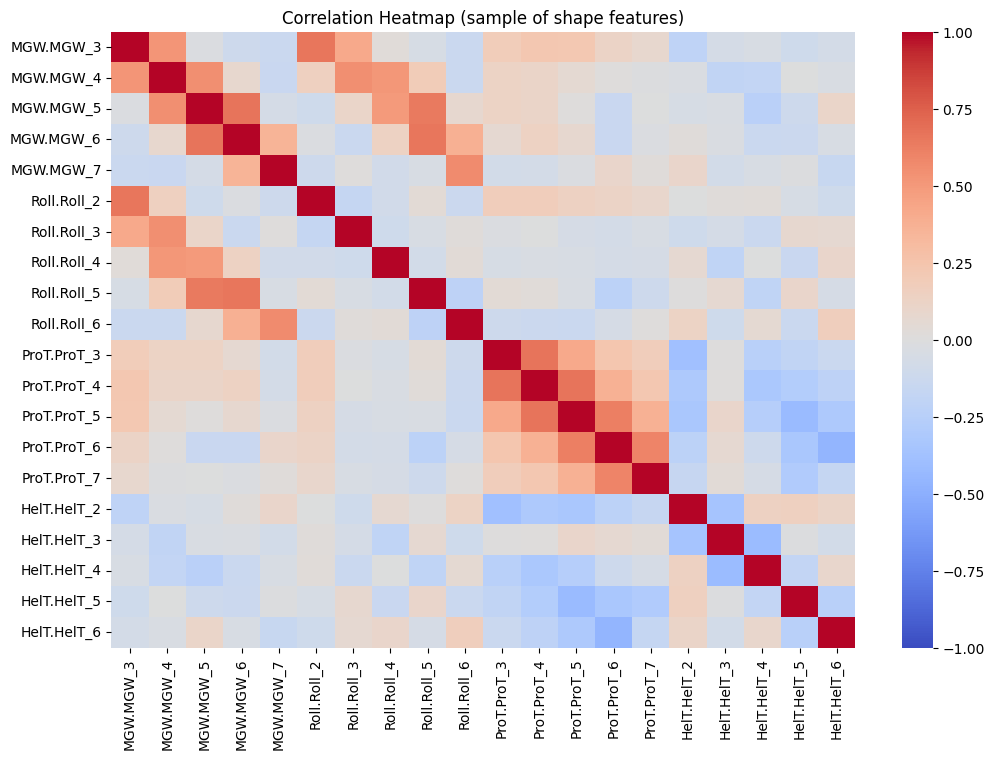

In [14]:
sample_cols = (
    [c for c in df.columns if c.startswith("MGW")][:5] +
    [c for c in df.columns if c.startswith("Roll")][:5] +
    [c for c in df.columns if c.startswith("ProT")][:5] +
    [c for c in df.columns if c.startswith("HelT")][:5]
)

corr = df[sample_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (sample of shape features)")
plt.show()


In [15]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_new.csv")
df.head()


df = df.drop(columns=["id"])


Split X and Y

In [16]:
X = df.drop(columns=["label"])
y = df["label"]


#train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


train logistic regression model

In [19]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_new.csv")

# 1) find columns that are all NaN
na_all_cols = df.columns[df.isna().all()]
print("All-NaN columns:", list(na_all_cols))

# 2) drop them
df = df.drop(columns=na_all_cols)

df.shape, df.isna().sum().sum()


All-NaN columns: ['MGW.MGW_1', 'MGW.MGW_2', 'MGW.MGW_14', 'MGW.MGW_15', 'HelT.HelT_1', 'HelT.HelT_14', 'ProT.ProT_1', 'ProT.ProT_2', 'ProT.ProT_14', 'ProT.ProT_15', 'Roll.Roll_1', 'Roll.Roll_14', 'EP.EP_1', 'EP.EP_2', 'EP.EP_14', 'EP.EP_15']


((190270, 59), np.int64(0))

In [20]:
total_nans = df.isna().sum().sum()
print("Total remaining NaNs:", total_nans)

if total_nans > 0:
    nan_cols = df.columns[df.isna().any()]
    print("Columns with remaining NaNs:\n", df[nan_cols].isna().sum())


Total remaining NaNs: 0


In [21]:
df

,id,MGW.MGW_3,MGW.MGW_4,MGW.MGW_5,MGW.MGW_6,MGW.MGW_7,MGW.MGW_8,MGW.MGW_9,MGW.MGW_10,MGW.MGW_11,...,EP.EP_5,EP.EP_6,EP.EP_7,EP.EP_8,EP.EP_9,EP.EP_10,EP.EP_11,EP.EP_12,EP.EP_13,label
0,neg_chr1_10003124-10003139_+_130871,4.95,5.42,5.56,4.93,4.77,4.96,5.39,5.56,5.14,...,-5.24,-5.35,-5.45,-5.57,-5.02,-6.68,-5.96,-7.86,-8.20,0
1,neg_chr1_10003350-10003365_+_96514,5.32,5.94,5.66,5.17,5.37,5.29,4.77,4.94,5.47,...,-5.18,-5.05,-5.10,-5.09,-5.21,-5.63,-6.99,-5.23,-7.65,0
2,neg_chr1_10003396-10003411_+_161663,4.94,5.30,5.29,4.77,4.97,5.76,5.55,4.33,4.54,...,-5.09,-5.21,-5.65,-6.82,-7.09,-5.71,-5.73,-6.99,-5.09,0
3,neg_chr1_10003430-10003445_+_150933,5.41,5.09,5.36,5.19,4.94,4.75,4.76,4.85,5.05,...,-5.02,-5.12,-5.31,-5.25,-5.29,-5.23,-7.34,-5.61,-5.27,0
4,neg_chr1_10003508-10003523_+_168825,5.46,5.19,5.13,5.53,5.43,5.06,5.08,5.09,5.02,...,-5.29,-6.56,-5.19,-5.16,-5.10,-5.25,-7.29,-5.36,-4.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190265,pos_chrX_99891882-99891897_+_94045,5.41,4.96,4.82,4.75,4.62,4.85,5.52,5.41,5.17,...,-5.39,-5.25,-5.38,-5.52,-6.71,-5.08,-5.05,-5.23,-5.29,1
190266,pos_chrX_99909430-99909445_-_94046,5.41,5.24,5.23,5.53,4.66,4.98,5.56,5.31,5.02,...,-5.43,-6.99,-7.78,-5.82,-6.68,-5.28,-5.61,-7.26,-5.70,1
190267,pos_chrX_99926330-99926345_-_94047,5.41,5.02,4.73,4.78,4.97,5.14,5.75,5.16,5.27,...,-5.05,-5.55,-7.16,-5.67,-6.55,-5.70,-5.22,-6.99,-5.58,1
190268,pos_chrX_99940859-99940874_-_94048,5.66,5.02,4.82,4.75,4.62,4.85,5.52,5.16,5.27,...,-5.39,-5.25,-5.38,-5.52,-6.71,-5.70,-5.22,-6.56,-5.30,1


In [22]:
X = df.drop(columns=["id", "label"])
y = df["label"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

In [23]:
import numpy as np
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())


NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0


In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.990986492878541
Precision: 0.986613188873841
Recall   : 0.9954801072160614
F1 Score : 0.991026814911707


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("RF Accuracy :", accuracy_score(y_test, rf_pred))
print("RF F1 Score :", f1_score(y_test, rf_pred))


RF Accuracy : 0.996715194197719
RF F1 Score : 0.9967230305413554


random forrest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Train the model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("RF Accuracy :", accuracy_score(y_test, y_pred_rf))
print("RF Precision:", precision_score(y_test, y_pred_rf))
print("RF Recall   :", recall_score(y_test, y_pred_rf))
print("RF F1 Score :", f1_score(y_test, y_pred_rf))
print("RF AUC      :", roc_auc_score(y_test, y_prob_rf))


RF Accuracy : 0.996715194197719
RF Precision: 0.9942474636544294
RF Recall   : 0.9992116466074525
RF F1 Score : 0.9967233741382474
RF AUC      : 0.9997883857907076


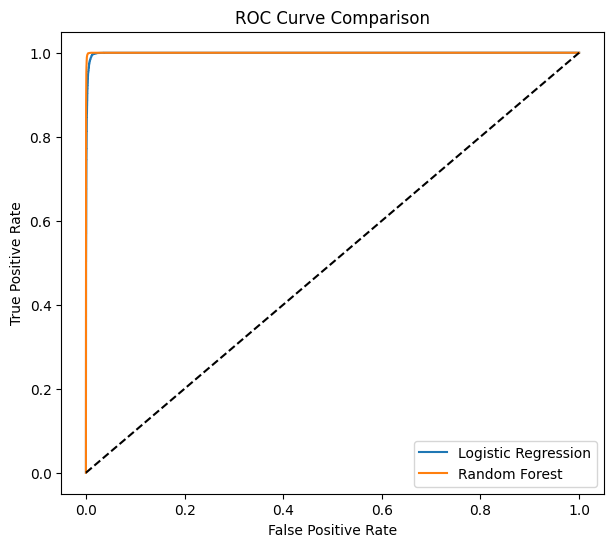

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# LR prob already computed earlier: y_prob
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


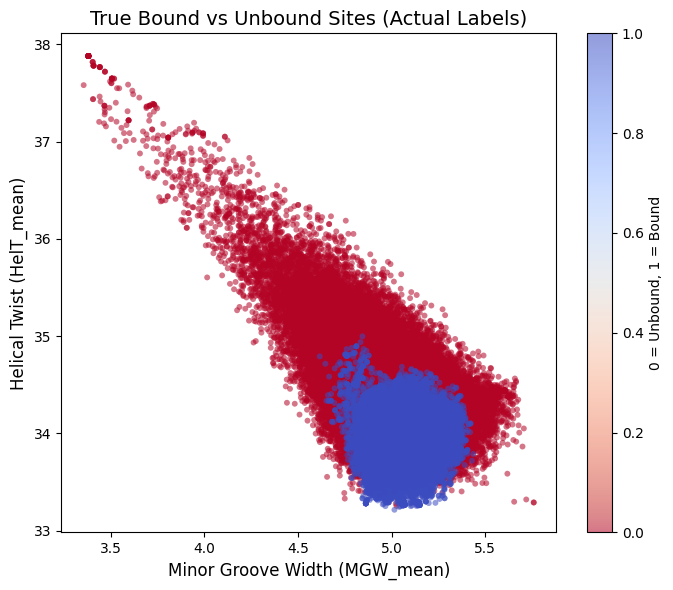

In [29]:
df["MGW_mean"] = df.filter(like="MGW").mean(axis=1)
df["HelT_mean"] = df.filter(like="HelT").mean(axis=1)



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pick two shape features — you MUST have MGW_mean and HelT_mean already computed.
# If they are named differently (like MGW.MGW_3), replace them:
x_feat = "MGW_mean"
y_feat = "HelT_mean"

plt.figure(figsize=(7,6))

scatter = plt.scatter(
    df[x_feat],
    df[y_feat],
    c=df["label"],
    cmap="coolwarm_r",   # 0 = blue, 1 = red
    alpha=0.55,
    s=18,
    edgecolor="none"
)

plt.xlabel("Minor Groove Width (MGW_mean)", fontsize=12)
plt.ylabel("Helical Twist (HelT_mean)", fontsize=12)
plt.title("True Bound vs Unbound Sites (Actual Labels)", fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("0 = Unbound, 1 = Bound")

plt.tight_layout()
plt.show()



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# -----------------------------
# LOGISTIC REGRESSION
# -----------------------------
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)

# Predictions
log_y_pred = logreg.predict(X_test_scaled)
log_y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Metrics
log_accuracy  = accuracy_score(y_test, log_y_pred)
log_precision = precision_score(y_test, log_y_pred)
log_recall    = recall_score(y_test, log_y_pred)
log_f1        = f1_score(y_test, log_y_pred)
log_auc       = roc_auc_score(y_test, log_y_prob)

print("=== Logistic Regression ===")
print("Accuracy :", log_accuracy)
print("Precision:", log_precision)
print("Recall   :", log_recall)
print("F1 Score :", log_f1)
print("AUC      :", log_auc)


# -----------------------------
# RANDOM FOREST
# -----------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)  # RF does NOT need scaling

# Predictions
rf_y_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)[:, 1]

# Metrics
rf_accuracy  = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall    = recall_score(y_test, rf_y_pred)
rf_f1        = f1_score(y_test, rf_y_pred)
rf_auc       = roc_auc_score(y_test, rf_y_prob)

print("\n=== Random Forest ===")
print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)
print("F1 Score :", rf_f1)
print("AUC      :", rf_auc)


=== Logistic Regression ===
Accuracy : 0.990986492878541
Precision: 0.986613188873841
Recall   : 0.9954801072160614
F1 Score : 0.991026814911707
AUC      : 0.9989727402144387

=== Random Forest ===
Accuracy : 0.996715194197719
Precision: 0.9942474636544294
Recall   : 0.9992116466074525
F1 Score : 0.9967233741382474
AUC      : 0.9997883857907076


CHECK WHY IT IS 99% CAUSE THAT SHIT IS TOO HIGH~!

In [31]:
import numpy as np

print("Unique labels:", np.unique(df["label"]))
print(df["label"].value_counts(normalize=True))


Unique labels: [0 1]
label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [32]:
print("Train label distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


Train label distribution:
label
1    0.5
0    0.5
Name: proportion, dtype: float64

Test label distribution:
label
1    0.5
0    0.5
Name: proportion, dtype: float64


In [33]:
X = df.drop(columns=["id", "label"])
y = df["label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit ONLY on train
X_test_scaled  = scaler.transform(X_test)


In [34]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# copy y and shuffle it
y_shuffled = shuffle(y, random_state=0)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_shuffled, test_size=0.2, random_state=42, stratify=y_shuffled
)

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled  = scaler_r.transform(X_test_r)

logreg_r = LogisticRegression(max_iter=5000)
logreg_r.fit(X_train_r_scaled, y_train_r)

y_pred_r = logreg_r.predict(X_test_r_scaled)
print("Accuracy with RANDOM labels:", accuracy_score(y_test_r, y_pred_r))


Accuracy with RANDOM labels: 0.4992379250538708


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_r = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_r.fit(X_train_r, y_train_r)
y_pred_rf_r = rf_r.predict(X_test_r)
print("RF accuracy with RANDOM labels:", accuracy_score(y_test_r, y_pred_rf_r))


RF accuracy with RANDOM labels: 0.49477058916276867


In [36]:
df["MGW_mean"] = df.filter(like="MGW").mean(axis=1)
df["HelT_mean"] = df.filter(like="HelT").mean(axis=1)

X_simple = df[["MGW_mean", "HelT_mean"]]
y_simple = df["label"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42, stratify=y_simple
)

scaler_s = StandardScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_test_s_scaled  = scaler_s.transform(X_test_s)

logreg_s = LogisticRegression(max_iter=5000)
logreg_s.fit(X_train_s_scaled, y_train_s)

from sklearn.metrics import accuracy_score
y_pred_s = logreg_s.predict(X_test_s_scaled)
print("Accuracy with ONLY MGW_mean + HelT_mean:", accuracy_score(y_test_s, y_pred_s))


Accuracy with ONLY MGW_mean + HelT_mean: 0.7914279707783676


In [37]:
import pandas as pd

# Make a working copy
df = df.copy()

# Identify columns for each DNA shape
mgw_cols  = [c for c in df.columns if c.startswith("MGW.")]
helt_cols = [c for c in df.columns if c.startswith("HelT.")]
prot_cols = [c for c in df.columns if c.startswith("ProT.")]
roll_cols = [c for c in df.columns if c.startswith("Roll.")]

# Compute means
df["MGW_mean"]  = df[mgw_cols].mean(axis=1)
df["HelT_mean"] = df[helt_cols].mean(axis=1)
df["ProT_mean"] = df[prot_cols].mean(axis=1)
df["Roll_mean"] = df[roll_cols].mean(axis=1)

df.shape



(190270, 63)

In [38]:
df[["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]].isna().sum()


MGW_mean     0
HelT_mean    0
ProT_mean    0
Roll_mean    0
dtype: int64

DROP THE EP, we arent interested in that rn, our main goal is:

MGW, Prot, roll, HelT

In [39]:
df = df[[c for c in df.columns if not c.startswith("EP.")]]


In [40]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_with_means.csv")

df.head()


,id,MGW.MGW_3,MGW.MGW_4,MGW.MGW_5,MGW.MGW_6,MGW.MGW_7,MGW.MGW_8,MGW.MGW_9,MGW.MGW_10,MGW.MGW_11,...,Roll.Roll_10,Roll.Roll_11,Roll.Roll_12,Roll.Roll_13,label,MGW_mean,HelT_mean,chrom,ProT_mean,Roll_mean
0,neg_chr1_10003124-10003139_+_130871,4.95,5.42,5.56,4.93,4.77,4.96,5.39,5.56,5.14,...,-2.30,-0.55,-3.43,-3.59,0,5.090000,34.643333,1_10003124,-6.023636,-1.490833
1,neg_chr1_10003350-10003365_+_96514,5.32,5.94,5.66,5.17,5.37,5.29,4.77,4.94,5.47,...,-2.69,4.10,-1.65,-3.46,0,5.321818,34.293333,1_10003350,-4.872727,-0.152500
2,neg_chr1_10003396-10003411_+_161663,4.94,5.30,5.29,4.77,4.97,5.76,5.55,4.33,4.54,...,-2.22,-3.04,3.95,-0.89,0,5.134545,33.784167,1_10003396,-4.058182,-0.797500
3,neg_chr1_10003430-10003445_+_150933,5.41,5.09,5.36,5.19,4.94,4.75,4.76,4.85,5.05,...,-1.73,-2.59,-2.00,2.81,0,5.084545,33.841667,1_10003430,-3.020000,-0.727500
4,neg_chr1_10003508-10003523_+_168825,5.46,5.19,5.13,5.53,5.43,5.06,5.08,5.09,5.02,...,-2.47,-1.77,-0.56,1.31,0,5.223636,34.132500,1_10003508,-4.741818,-0.119167


C:\Users\saleh\AppData\Local\Temp\ipykernel_31228\1574411174.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette=["blue","red"])


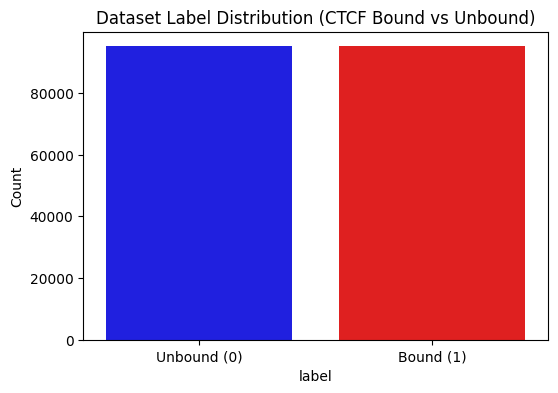

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_with_means.csv")

plt.figure(figsize=(6,4))
sns.countplot(x=df["label"], palette=["blue","red"])
plt.xticks([0,1], ["Unbound (0)", "Bound (1)"])
plt.ylabel("Count")
plt.title("Dataset Label Distribution (CTCF Bound vs Unbound)")
plt.show()


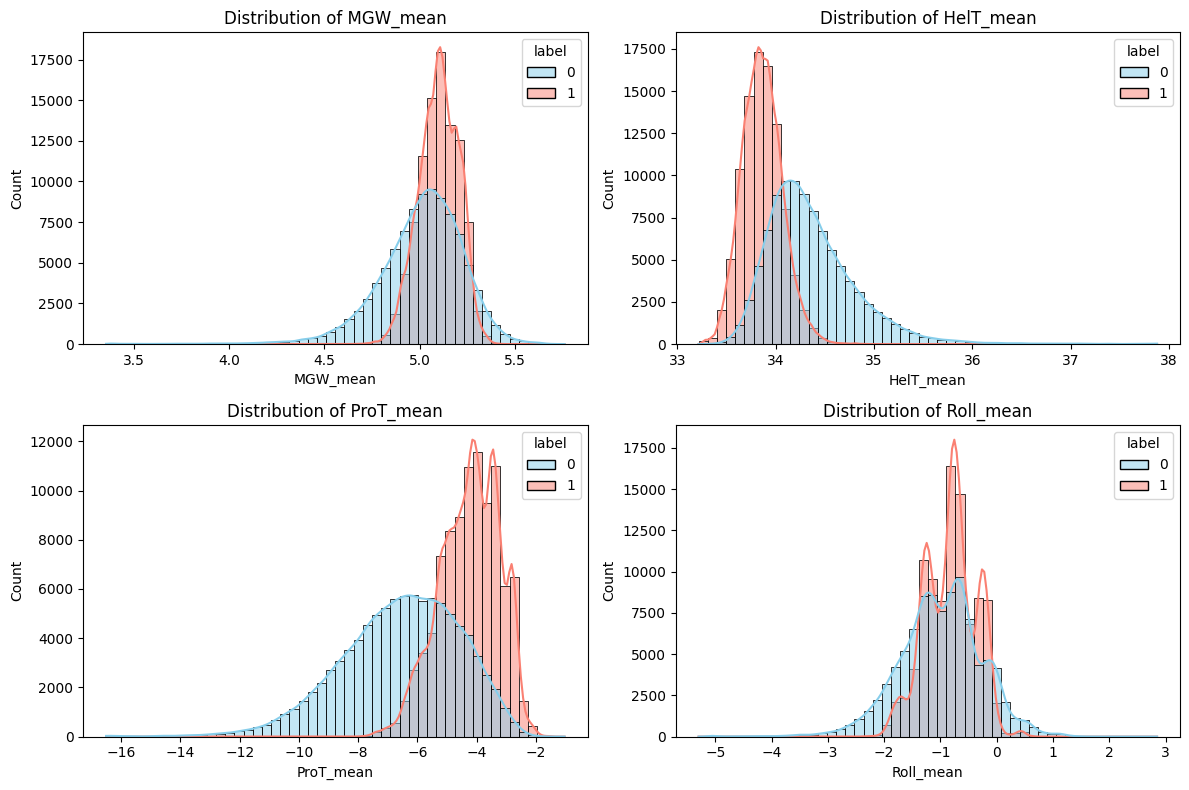

In [42]:
plt.figure(figsize=(12,8))

features = ["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]

for i, feat in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=df, x=feat, hue="label", bins=50, kde=True,
                 palette={0:"skyblue",1:"salmon"}, alpha=0.5)
    plt.title(f"Distribution of {feat}")

plt.tight_layout()
plt.show()


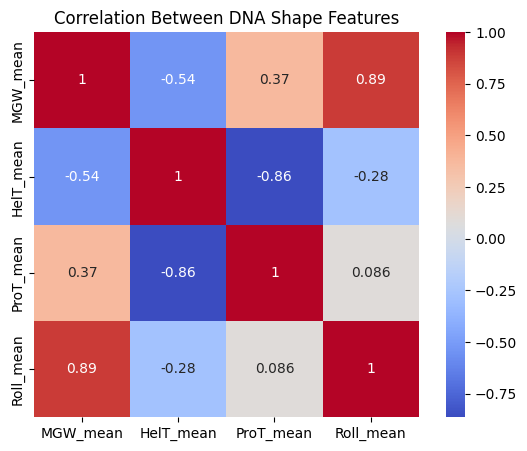

In [43]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["MGW_mean","HelT_mean","ProT_mean","Roll_mean"]].corr(),
            annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Between DNA Shape Features")
plt.show()


In [44]:
X = df[["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]]
y = df["label"]


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)

y_pred_log = logreg.predict(X_test_scaled)
y_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]

print("=== LOGISTIC REGRESSION ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("AUC      :", roc_auc_score(y_test, y_prob_log))


=== LOGISTIC REGRESSION ===
Accuracy : 0.822541651337573
Precision: 0.7945665738696361
Recall   : 0.8700268040153466
F1 Score : 0.8305862873485361
AUC      : 0.896746161248221


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== RANDOM FOREST ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("AUC      :", roc_auc_score(y_test, y_prob_rf))



=== RANDOM FOREST ===
Accuracy : 0.8776212750302202
Precision: 0.8507615700058583
Recall   : 0.9159089714616072
F1 Score : 0.8821340892409709
AUC      : 0.9561459051825978


In [49]:
X_mean = df[["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]]
y_mean = df["label"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mean, y_mean, test_size=0.2, random_state=42, stratify=y_mean
)

scaler2 = StandardScaler()
Xm_train_s = scaler2.fit_transform(Xm_train)
Xm_test_s = scaler2.transform(Xm_test)

# Logistic reg mean
log_mean = LogisticRegression(max_iter=10000)
log_mean.fit(Xm_train_s, ym_train)

pred_log_mean = log_mean.predict(Xm_test_s)
prob_log_mean = log_mean.predict_proba(Xm_test_s)[:, 1]

# Random forest mean
rf_mean = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_mean.fit(Xm_train, ym_train)

pred_rf_mean = rf_mean.predict(Xm_test)
prob_rf_mean = rf_mean.predict_proba(Xm_test)[:, 1]



#RESULTS
# ------------------------------
def show_results(name, y_true, pred, prob):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, pred))
    print("Precision:", precision_score(y_true, pred))
    print("Recall   :", recall_score(y_true, pred))
    print("F1 Score :", f1_score(y_true, pred))
    print("AUC      :", roc_auc_score(y_true, prob))



show_results("MEAN Logistic Regression", ym_test, pred_log_mean, prob_log_mean)
show_results("MEAN Random Forest", ym_test, pred_rf_mean, prob_rf_mean)


=== MEAN Logistic Regression ===
Accuracy : 0.822541651337573
Precision: 0.7945665738696361
Recall   : 0.8700268040153466
F1 Score : 0.8305862873485361
AUC      : 0.896746161248221

=== MEAN Random Forest ===
Accuracy : 0.8776212750302202
Precision: 0.8507615700058583
Recall   : 0.9159089714616072
F1 Score : 0.8821340892409709
AUC      : 0.9561459051825978


In [67]:
from sklearn.neighbors import KNeighborsClassifier

#
# KNN classifier (scaled features)
# 

knn_mean = KNeighborsClassifier(
    n_neighbors=5,      
    weights="distance", 
    metric="minkowski"  # Euclidean distance
)

knn_mean.fit(Xm_train_s, ym_train)

pred_knn_mean = knn_mean.predict(Xm_test_s)
prob_knn_mean = knn_mean.predict_proba(Xm_test_s)[:, 1]


show_results("MEAN KNN (k=5)", ym_test, pred_knn_mean, prob_knn_mean)



=== MEAN KNN (k=5) ===
Accuracy : 0.8629053450360015
Precision: 0.8261999244142101
Recall   : 0.91916749881747
F1 Score : 0.8702077372807563
AUC      : 0.9320626930836371


In [71]:
for k in [1, 3, 5, 7, 11, 16]:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(Xm_train_s, ym_train)

    pred = knn.predict(Xm_test_s)
    prob = knn.predict_proba(Xm_test_s)[:, 1]

    print(f"\n=== KNN (k={k}) ===")
    print("Accuracy:", accuracy_score(ym_test, pred))
    print("AUC     :", roc_auc_score(ym_test, prob))



=== KNN (k=1) ===
Accuracy: 0.8497135649340412
AUC     : 0.849713564934041

=== KNN (k=3) ===
Accuracy: 0.8601198297156673
AUC     : 0.913629084553036

=== KNN (k=5) ===
Accuracy: 0.8629053450360015
AUC     : 0.9320626930836371

=== KNN (k=7) ===
Accuracy: 0.8655594681242444
AUC     : 0.9405573586805519

=== KNN (k=11) ===
Accuracy: 0.8676617438377043
AUC     : 0.9495709970077928

=== KNN (k=16) ===
Accuracy: 0.869001944605035
AUC     : 0.9543633751970841


   n_estimators  max_depth  accuracy
0           200         10  0.847638
1           200         20  0.875834
2           200         30  0.876702
3           500         10  0.847506
4           500         20  0.876097
5           500         30  0.876491
6           800         10  0.847638
7           800         20  0.876281
8           800         30  0.876439


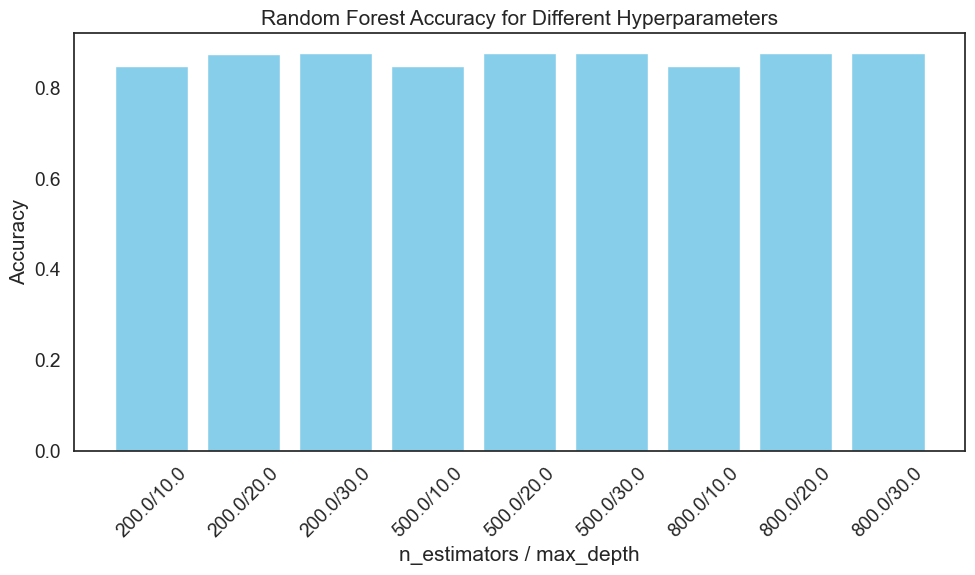

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

param_grid_small = {
    "n_estimators": [200, 500, 800,1200,1500],     #tree count
    "max_depth": [10, 20, 30,50,80]          #control complexity
}




results = []

for n in [200, 500, 800]:
    for depth in [10, 20, 30]:

        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            random_state=42,
            n_jobs=-1
        )

        rf.fit(Xm_train, ym_train)
        pred = rf.predict(Xm_test)
        acc = accuracy_score(ym_test, pred)

        results.append({
            "n_estimators": n,
            "max_depth": depth,
            "accuracy": acc
        })

results_df = pd.DataFrame(results)
print(results_df)



import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.bar(
    x=range(len(results_df)),
    height=results_df["accuracy"],
    color="skyblue"
)

plt.xticks(
    ticks=range(len(results_df)),
    labels=[f"{row.n_estimators}/{row.max_depth}" for _, row in results_df.iterrows()],
    rotation=45
)

plt.ylabel("Accuracy")
plt.xlabel("n_estimators / max_depth")
plt.title("Random Forest Accuracy for Different Hyperparameters")
plt.tight_layout()
plt.show()



CONFUSION MATRIX FOR RANDOM FORREST (we want liek 4 boxes in the plot)

Confusion Matrix:
[[15970  3057]
 [ 1600 17427]]


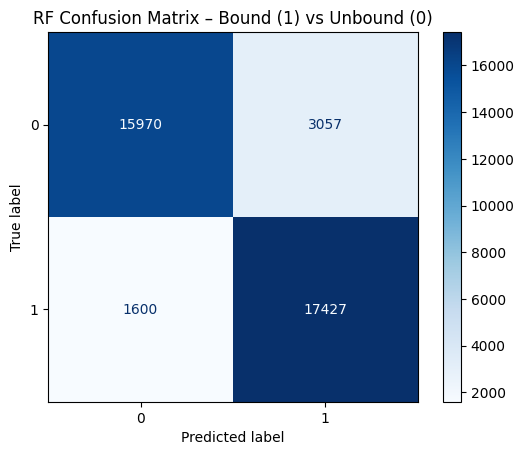

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_with_means.csv")

# Features (the four mean values)
X = df[["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]]
y = df["label"]

#
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 
# Scale features
# 
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 
# (Random Forest)
# 
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

#
#Confusion Matrix (numeric output)
# 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format="d")
plt.title("RF Confusion Matrix – Bound (1) vs Unbound (0)")
plt.show()


Confusion Matrix:
[[14747  4280]
 [ 2473 16554]]


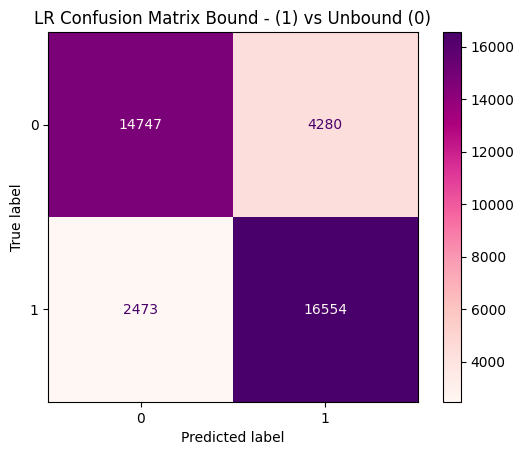

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\saleh\561_project\data\CTCF_shapes_with_means.csv")


X = df[["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]]
y = df["label"]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_s, y_train)


y_pred = logreg.predict(X_test_s)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="RdPu", values_format="d")
plt.title("LR Confusion Matrix Bound - (1) vs Unbound (0)")
plt.show()


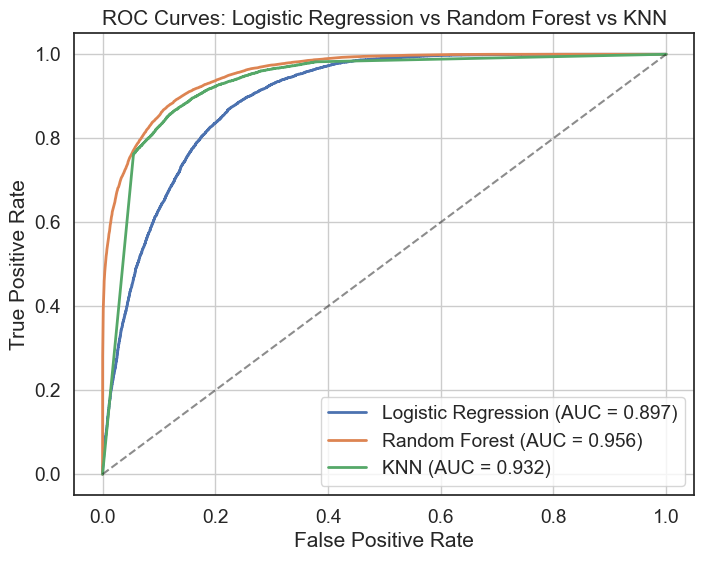

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter=10000)
logreg.fit(Xm_train_s, ym_train)

prob_log = logreg.predict_proba(Xm_test_s)[:, 1]
fpr_log, tpr_log, _ = roc_curve(ym_test, prob_log)
auc_log = roc_auc_score(ym_test, prob_log)


# RANDOM FOREST
# (uses UNscaled features)

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(Xm_train, ym_train)

prob_rf = rf.predict_proba(Xm_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(ym_test, prob_rf)
auc_rf = roc_auc_score(ym_test, prob_rf)


# KNN (uses scaled features)

knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(Xm_train_s, ym_train)

prob_knn = knn.predict_proba(Xm_test_s)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(ym_test, prob_knn)
auc_knn = roc_auc_score(ym_test, prob_knn)


# PLOT ALL ROC CURVES

plt.figure(figsize=(8,6))

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})", linewidth=2)

plt.plot([0,1], [0,1], 'k--', alpha=0.5)  # Chance diagonal

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Logistic Regression vs Random Forest vs KNN")
plt.legend()
plt.grid(True)
plt.show()


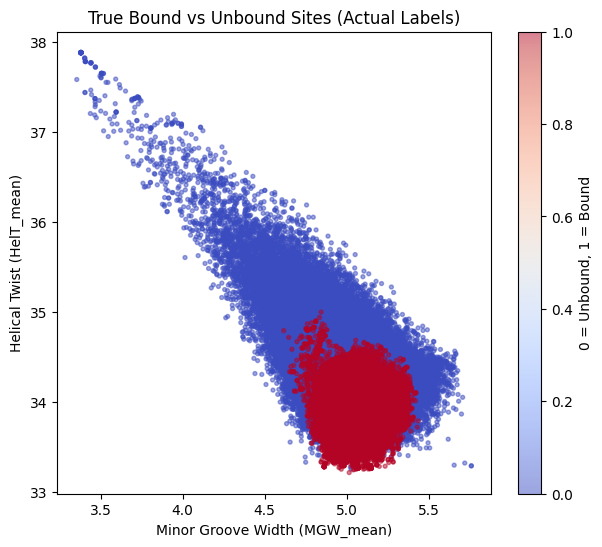

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

plt.scatter(
    df["MGW_mean"],
    df["HelT_mean"],
    c=df["label"],
    cmap="coolwarm",
    alpha=0.5,
    s=8
)

plt.xlabel("Minor Groove Width (MGW_mean)")
plt.ylabel("Helical Twist (HelT_mean)")
plt.title("True Bound vs Unbound Sites (Actual Labels)")

cbar = plt.colorbar()
cbar.set_label("0 = Unbound, 1 = Bound")

plt.show()


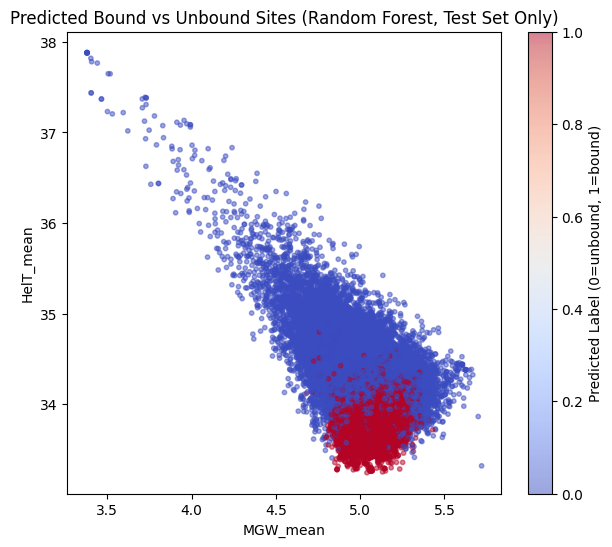

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# build a test-only dataframe
test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_rf_mean   # or pred_log_mean
})

plt.figure(figsize=(7,6))
plt.scatter(
    test_df["MGW_mean"],
    test_df["HelT_mean"],
    c=test_df["predicted_label"],
    cmap="coolwarm",
    alpha=0.5,
    s=10
)

plt.title("Predicted Bound vs Unbound Sites (Random Forest, Test Set Only)")
plt.xlabel("MGW_mean")
plt.ylabel("HelT_mean")
plt.colorbar(label="Predicted Label (0=unbound, 1=bound)")
plt.show()


In [56]:
# Logistic regression prediction
pred_log_mean = logreg_mean.predict(Xm_test_scaled)

log_test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_log_mean
})

plt.figure(figsize=(7,6))
plt.scatter(
    log_test_df["MGW_mean"],
    log_test_df["HelT_mean"],
    c=log_test_df["predicted_label"],
    cmap="coolwarm",
    alpha=0.6,
    s=10
)

plt.title("Predicted Bound vs Unbound (Logistic Regression, Test Set)")
plt.xlabel("MGW_mean")
plt.ylabel("HelT_mean")
plt.colorbar(label="Predicted Label (0=unbound, 1=bound)")
plt.show()


NameError: name 'logreg_mean' is not defined

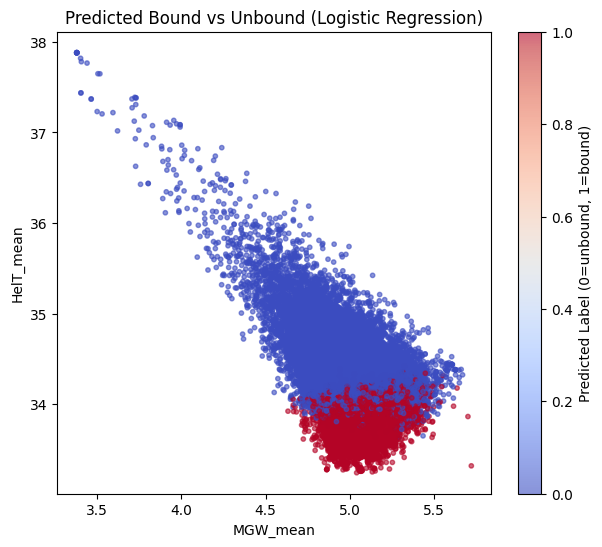

In [57]:
# Logistic Regression predictions already computed:
# pred_log_mean  (0/1 labels)
# Xm_test, Xm_test_s, ym_test

log_test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_log_mean
})

plt.figure(figsize=(7,6))
plt.scatter(
    log_test_df["MGW_mean"],
    log_test_df["HelT_mean"],
    c=log_test_df["predicted_label"],
    cmap="coolwarm",
    alpha=0.6,
    s=10
)
plt.title("Predicted Bound vs Unbound (Logistic Regression)")
plt.xlabel("MGW_mean")
plt.ylabel("HelT_mean")
plt.colorbar(label="Predicted Label (0=unbound, 1=bound)")
plt.show()


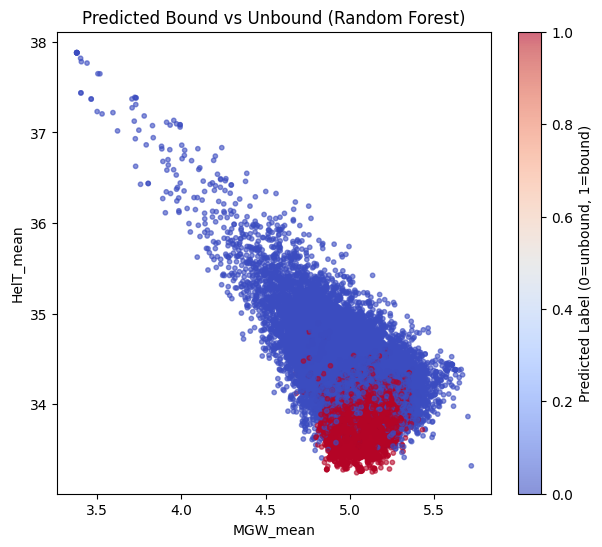

In [58]:
rf_test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_rf_mean
})

plt.figure(figsize=(7,6))
plt.scatter(
    rf_test_df["MGW_mean"],
    rf_test_df["HelT_mean"],
    c=rf_test_df["predicted_label"],
    cmap="coolwarm",
    alpha=0.6,
    s=10
)
plt.title("Predicted Bound vs Unbound (Random Forest)")
plt.xlabel("MGW_mean")
plt.ylabel("HelT_mean")
plt.colorbar(label="Predicted Label (0=unbound, 1=bound)")
plt.show()


c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecat

<Figure size 1400x1400 with 0 Axes>

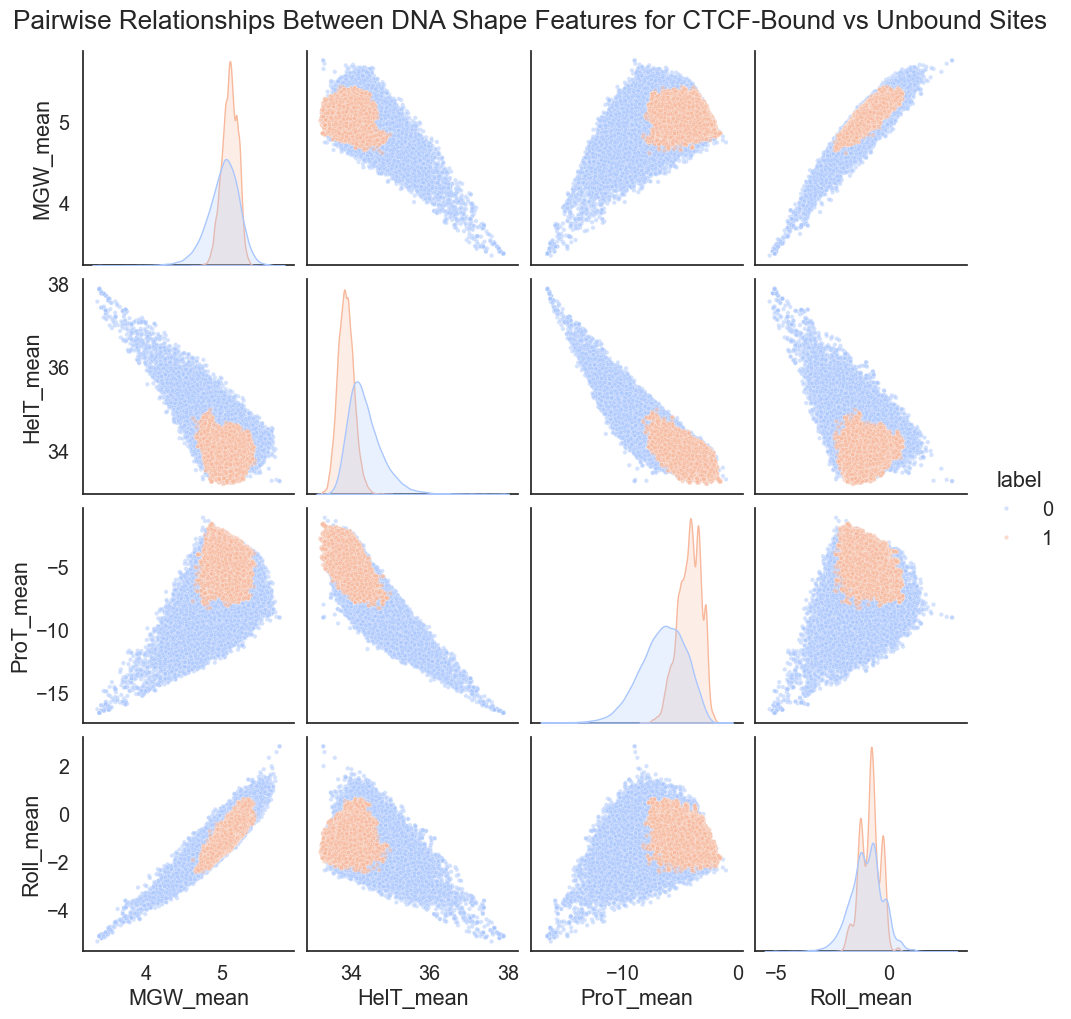

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


mean_features = ["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"]


plot_df = df[mean_features + ["label"]].copy()
plot_df["label"] = plot_df["label"].astype(int)

sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(14, 14))
pair = sns.pairplot(
    data=plot_df,
    vars=mean_features,
    hue="label",
    diag_kind="kde",
    palette="coolwarm",
    plot_kws={"alpha": 0.5, "s": 10},
    diag_kws={"shade": True}
)

pair.fig.suptitle("Pairwise Relationships Between DNA Shape Features for CTCF-Bound vs Unbound Sites", y=1.02)
plt.show()


predicted using model:

In [60]:
#
# plot the log and random forrest predictions but for the Mgw, helt, prot, and roll
# 

# Logistic regression
log_test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "ProT_mean": Xm_test["ProT_mean"].values,
    "Roll_mean": Xm_test["Roll_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_log_mean
})

# Random Forest
rf_test_df = pd.DataFrame({
    "MGW_mean": Xm_test["MGW_mean"].values,
    "HelT_mean": Xm_test["HelT_mean"].values,
    "ProT_mean": Xm_test["ProT_mean"].values,
    "Roll_mean": Xm_test["Roll_mean"].values,
    "true_label": ym_test.values,
    "predicted_label": pred_rf_mean
})


c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecat

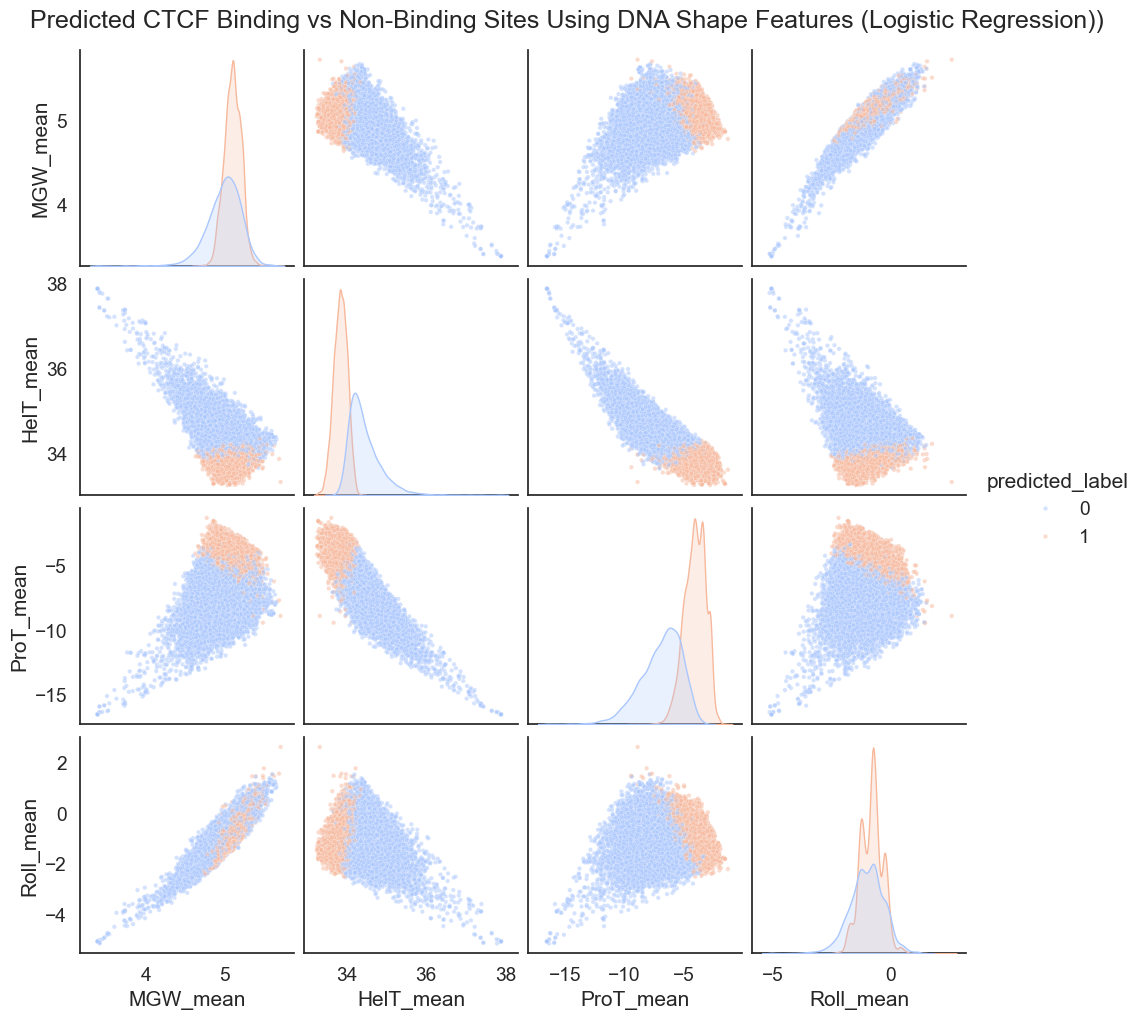

In [61]:
sns.set(style="white", font_scale=1.25)

log_plot = sns.pairplot(
    log_test_df,
    vars=["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"],
    hue="predicted_label",
    diag_kind="kde",
    palette="coolwarm",
    plot_kws={"alpha":0.5, "s":10},
    diag_kws={"shade":True}
)

log_plot.fig.suptitle("Predicted CTCF Binding vs Non-Binding Sites Using DNA Shape Features (Logistic Regression))", y=1.02)
plt.show()


c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\saleh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecat

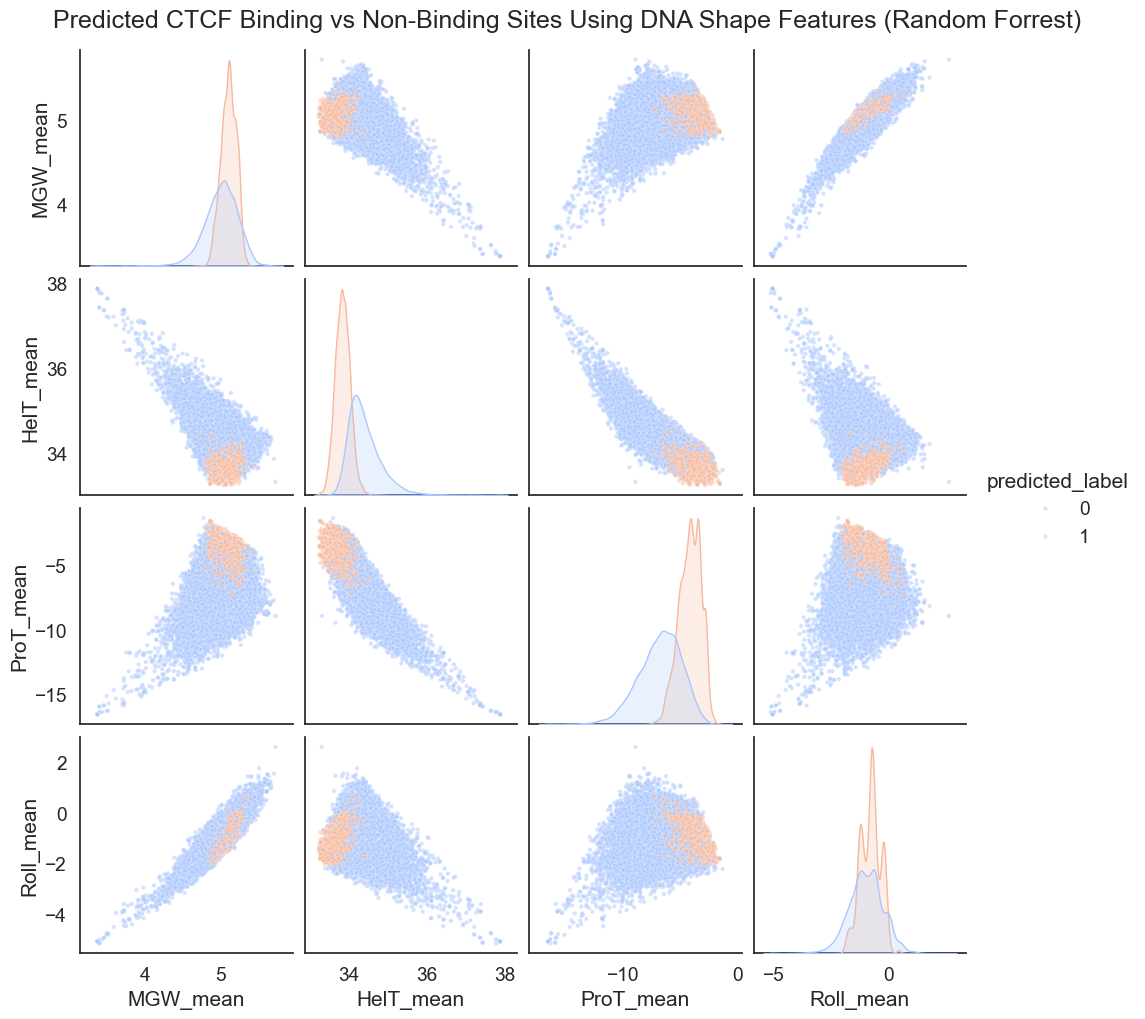

In [62]:
rf_plot = sns.pairplot(
    rf_test_df,
    vars=["MGW_mean", "HelT_mean", "ProT_mean", "Roll_mean"],
    hue="predicted_label",
    diag_kind="kde",
    palette="coolwarm",
    plot_kws={"alpha":0.5, "s":10},
    diag_kws={"shade":True}
)

rf_plot.fig.suptitle("Predicted CTCF Binding vs Non-Binding Sites Using DNA Shape Features (Random Forrest)", y=1.02)
plt.show()


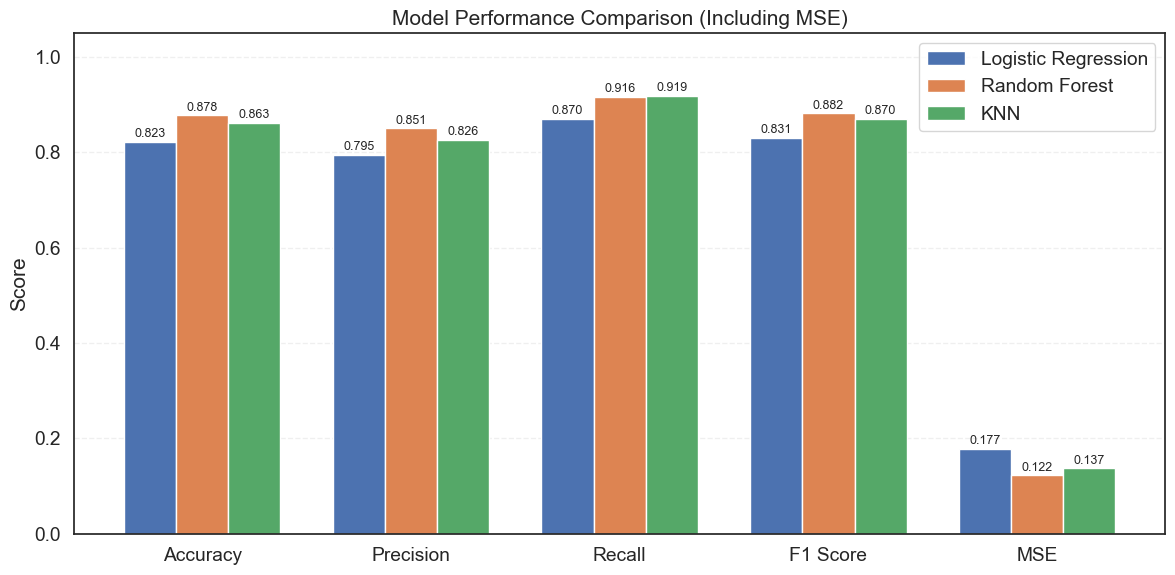

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Compute metrics for all models
# -------------------------------------------------------

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, mean_squared_error
)

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)

# Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# KNN (using your chosen k, ex: k=7)
acc_knn = accuracy_score(ym_test, pred_knn_mean)
prec_knn = precision_score(ym_test, pred_knn_mean)
rec_knn = recall_score(ym_test, pred_knn_mean)
f1_knn = f1_score(ym_test, pred_knn_mean)
mse_knn = mean_squared_error(ym_test, pred_knn_mean)


# -------------------------------------------------------
# 2. Organize for plotting
# -------------------------------------------------------
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "MSE"]

log_values = [acc_log, prec_log, rec_log, f1_log, mse_log]
rf_values  = [acc_rf,  prec_rf,  rec_rf,  f1_rf,  mse_rf]
knn_values = [acc_knn, prec_knn, rec_knn, f1_knn, mse_knn]

x = np.arange(len(metrics))
width = 0.25

# -------------------------------------------------------
# 3. Plot
# -------------------------------------------------------
plt.figure(figsize=(12,6))

plt.bar(x - width, log_values, width, label="Logistic Regression")
plt.bar(x,         rf_values,  width, label="Random Forest")
plt.bar(x + width, knn_values, width, label="KNN")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Including MSE)")
plt.legend()

# Add numeric labels above bars
def add_labels(values, offset):
    for i, v in enumerate(values):
        plt.text(i + offset, v + 0.01, f"{v:.3f}", ha="center", fontsize=9)

add_labels(log_values, -width)
add_labels(rf_values, 0)
add_labels(knn_values, width)

plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
